# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [27]:
# Code Here
#!pip install palmerpenguins

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.preprocessing import label_binarize
from plotnine import ggplot, aes, geom_line, geom_abline, annotate, labs, theme_minimal

In [29]:
data = load_penguins()

data = data.dropna()

data['species'] = LabelEncoder().fit_transform(data['species'])
categorical_columns = ['island', 'sex']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [30]:
# Code Here
X = data.drop(columns='species')
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [31]:
# 1.kNN models with different values of K
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

# 2. Decision Tree models with different max depths
dt_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_3.fit(X_train, y_train)

dt_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_10.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [32]:
models = {
    "kNN (k=3)": knn_3,
    "kNN (k=10)": knn_10,
    "Decision Tree (depth=3)": dt_3,
    "Decision Tree (depth=10)": dt_10,
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    roc_auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]), model.predict_proba(X_test), average=None, multi_class="ovr")

    results.append({
        "Model": name,
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": roc_auc
    })

In [33]:
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Accuracy: {result['Accuracy']:.3f}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1-Score: {result['F1-Score']}")
    print(f"AUC: {result['AUC']}")
    print("-" * 30)

Model: kNN (k=3)
Confusion Matrix:
[[28  1  0]
 [ 1 13  0]
 [ 0  0 24]]
Accuracy: 0.970
Precision: [0.96551724 0.92857143 1.        ]
Recall: [0.96551724 0.92857143 1.        ]
F1-Score: [0.96551724 0.92857143 1.        ]
AUC: [0.99909256 0.99865229 1.        ]
------------------------------
Model: kNN (k=10)
Confusion Matrix:
[[28  1  0]
 [ 0 14  0]
 [ 0  0 24]]
Accuracy: 0.985
Precision: [1.         0.93333333 1.        ]
Recall: [0.96551724 1.         1.        ]
F1-Score: [0.98245614 0.96551724 1.        ]
AUC: [1. 1. 1.]
------------------------------
Model: Decision Tree (depth=3)
Confusion Matrix:
[[29  0  0]
 [ 1 13  0]
 [ 2  0 22]]
Accuracy: 0.955
Precision: [0.90625 1.      1.     ]
Recall: [1.         0.92857143 0.91666667]
F1-Score: [0.95081967 0.96296296 0.95652174]
AUC: [0.94736842 0.99865229 0.95833333]
------------------------------
Model: Decision Tree (depth=10)
Confusion Matrix:
[[26  3  0]
 [ 0 14  0]
 [ 2  0 22]]
Accuracy: 0.925
Precision: [0.92857143 0.82352941 1.

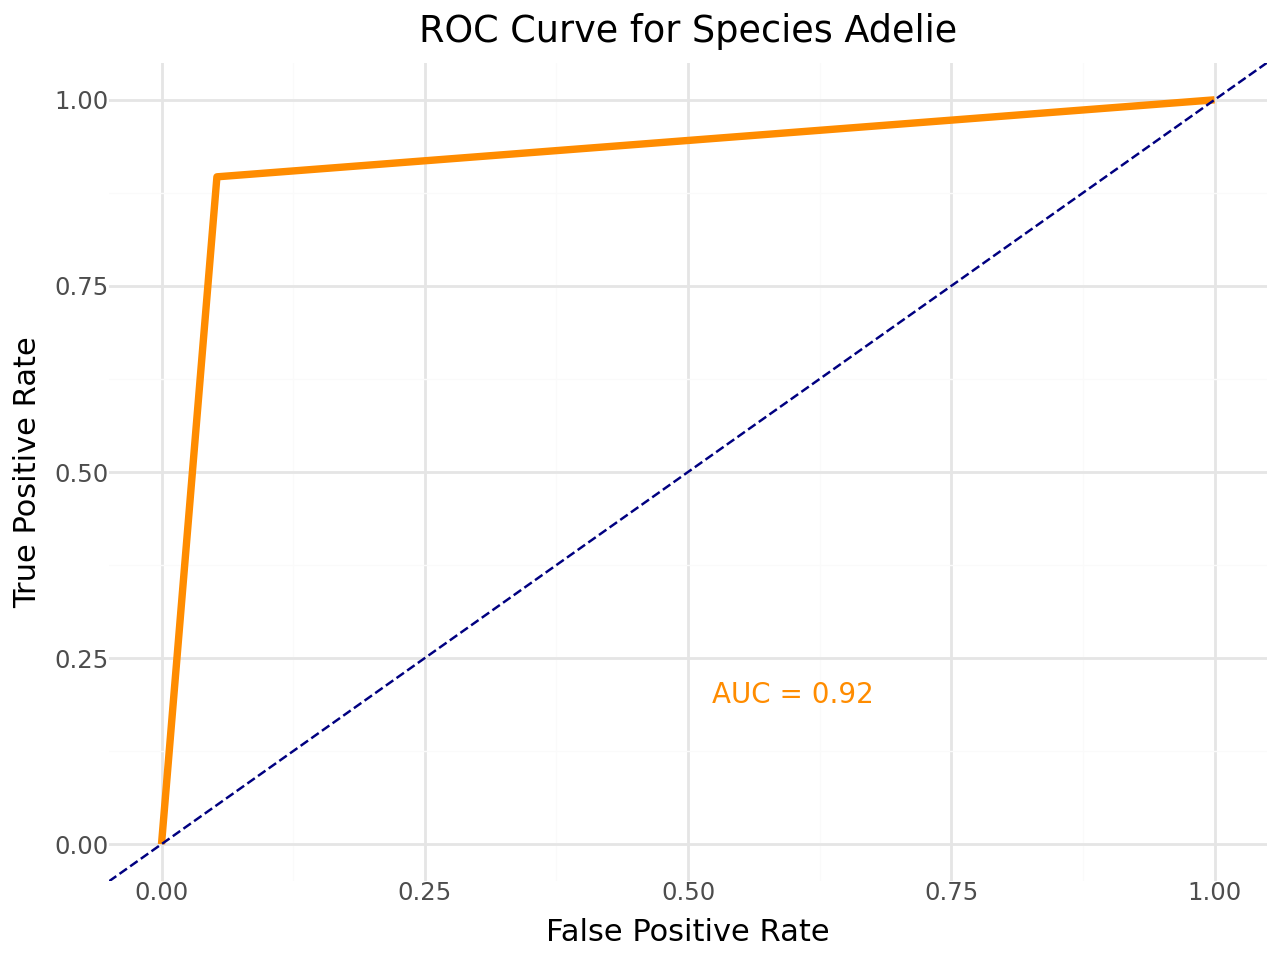

In [36]:
chosen_model = dt_10
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = chosen_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_score[:, 0])
roc_auc = auc(fpr, tpr)

roc_data = pd.DataFrame({
    "False Positive Rate": fpr,
    "True Positive Rate": tpr
})

roc_plot = (
    ggplot(roc_data, aes(x="False Positive Rate", y="True Positive Rate")) +
    geom_line(color="darkorange", size=1.5) +
    geom_abline(intercept=0, slope=1, linetype="dashed", color="navy") +
    annotate("text", x=0.6, y=0.2, label=f"AUC = {roc_auc:.2f}", size=10, color="darkorange") +
    labs(
        title="ROC Curve for Species Adelie",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

roc_plot